In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sz
import pandas as pd
import pandas as pd
from scapy.all import rdpcap
from tueplots import bundles
from tueplots.constants.color import rgb
from matplotlib.colors import LinearSegmentedColormap
from tqdm import tqdm
import binascii


In [18]:
df_all = pd.read_csv(
    "C:\\Users\Philipp\OneDrive - UT Cloud\Data_literacy_mensa\Mensa_data_combined\\wednesday100124.csv")
df_all

,frame.time,wlan.sa,wlan.da,_ws.col.protocol,wlan.ssid,wlan.bssid,wlan.seq,wlan.fc.type_subtype
0,"Jan 10, 2024 10:01:07.758711000 Mitteleuropäis...",00:f6:63:81:c8:6b,ff:ff:ff:ff:ff:ff,802.11,55546775657374,00:f6:63:81:c8:6b,711.0,0x0008
1,"Jan 10, 2024 10:01:07.784807000 Mitteleuropäis...",NaN,NaN,802.11,NaN,NaN,NaN,0x0018
2,"Jan 10, 2024 10:01:07.794917000 Mitteleuropäis...",50:ed:3c:13:d7:4d,00:f6:63:81:c8:6f,802.11,NaN,00:f6:63:81:c8:6f,2795.0,0x0024
3,"Jan 10, 2024 10:01:07.795010000 Mitteleuropäis...",NaN,NaN,802.11,NaN,NaN,NaN,0x001d
4,"Jan 10, 2024 10:01:07.795542000 Mitteleuropäis...",00:f6:63:81:c8:6e,ff:ff:ff:ff:ff:ff,802.11,4775657374,00:f6:63:81:c8:6e,712.0,0x0008
...,...,...,...,...,...,...,...,...
15338369,"Jan 10, 2024 12:59:52.317226000 Mitteleuropäis...",NaN,NaN,802.11,NaN,NaN,NaN,0x001b
15338370,"Jan 10, 2024 12:59:52.317274000 Mitteleuropäis...",NaN,NaN,802.11,NaN,NaN,NaN,0x001c
15338371,"Jan 10, 2024 12:59:52.317323000 Mitteleuropäis...",NaN,NaN,802.11,NaN,NaN,NaN,NaN
15338372,"Jan 10, 2024 12:59:52.317375000 Mitteleuropäis...",NaN,NaN,802.11,NaN,NaN,NaN,0x0019


C:\Users\Philipp\AppData\Local\Temp\ipykernel_16868\4282230850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all["frame.time"] = df_all["frame.time"].str.replace(r':\d+\.\d+', '', regex=True)


<Axes: ylabel='Density'>

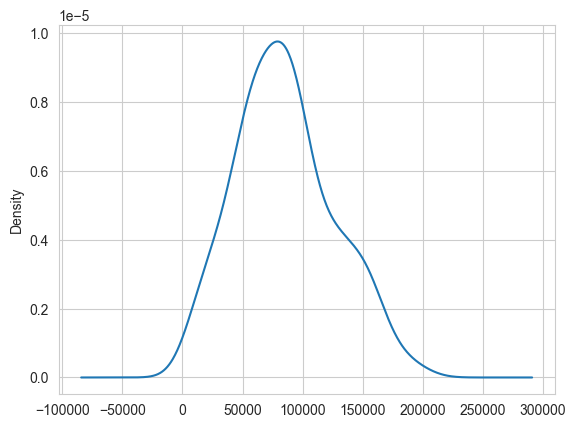

In [19]:
df_all = df_all.loc[df_all["_ws.col.protocol"] == "802.11"]
df_all["frame.time"] = df_all["frame.time"].str.replace(r':\d+\.\d+', '', regex=True)
df_all["frame.time"].value_counts().sort_index().plot(kind='density')


In [20]:
df_all['date-time'] = pd.to_datetime(df_all['frame.time'].str.replace('Mitteleuropäische Zeit', 'CET'),
                                     format='%b %d, %Y %H:%M %Z')
df_all['hour:minute'] = df_all['date-time'].dt.strftime('%H:%M')
df_all

C:\Users\Philipp\AppData\Local\Temp\ipykernel_16868\828931816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['date-time'] = pd.to_datetime(df_all['frame.time'].str.replace('Mitteleuropäische Zeit', 'CET'),
C:\Users\Philipp\AppData\Local\Temp\ipykernel_16868\828931816.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['hour:minute'] = df_all['date-time'].dt.strftime('%H:%M')


,frame.time,wlan.sa,wlan.da,_ws.col.protocol,wlan.ssid,wlan.bssid,wlan.seq,wlan.fc.type_subtype,date-time,hour:minute
0,"Jan 10, 2024 10:01 Mitteleuropäische Zeit",00:f6:63:81:c8:6b,ff:ff:ff:ff:ff:ff,802.11,55546775657374,00:f6:63:81:c8:6b,711.0,0x0008,2024-01-10 10:01:00+01:00,10:01
1,"Jan 10, 2024 10:01 Mitteleuropäische Zeit",NaN,NaN,802.11,NaN,NaN,NaN,0x0018,2024-01-10 10:01:00+01:00,10:01
2,"Jan 10, 2024 10:01 Mitteleuropäische Zeit",50:ed:3c:13:d7:4d,00:f6:63:81:c8:6f,802.11,NaN,00:f6:63:81:c8:6f,2795.0,0x0024,2024-01-10 10:01:00+01:00,10:01
3,"Jan 10, 2024 10:01 Mitteleuropäische Zeit",NaN,NaN,802.11,NaN,NaN,NaN,0x001d,2024-01-10 10:01:00+01:00,10:01
4,"Jan 10, 2024 10:01 Mitteleuropäische Zeit",00:f6:63:81:c8:6e,ff:ff:ff:ff:ff:ff,802.11,4775657374,00:f6:63:81:c8:6e,712.0,0x0008,2024-01-10 10:01:00+01:00,10:01
...,...,...,...,...,...,...,...,...,...,...
15338369,"Jan 10, 2024 12:59 Mitteleuropäische Zeit",NaN,NaN,802.11,NaN,NaN,NaN,0x001b,2024-01-10 12:59:00+01:00,12:59
15338370,"Jan 10, 2024 12:59 Mitteleuropäische Zeit",NaN,NaN,802.11,NaN,NaN,NaN,0x001c,2024-01-10 12:59:00+01:00,12:59
15338371,"Jan 10, 2024 12:59 Mitteleuropäische Zeit",NaN,NaN,802.11,NaN,NaN,NaN,NaN,2024-01-10 12:59:00+01:00,12:59
15338372,"Jan 10, 2024 12:59 Mitteleuropäische Zeit",NaN,NaN,802.11,NaN,NaN,NaN,0x0019,2024-01-10 12:59:00+01:00,12:59


In [24]:
eduroam_ssid = "656475726f616d"

df_beacons = df_all.loc[df_all["wlan.fc.type_subtype"] == "0x0008"]
df_beacons_only_broadcast = df_all.loc[(df_all["wlan.fc.type_subtype"] == "0x0008") & (df_all["wlan.da"] == "ff:ff:ff:ff:ff:ff")]
df_eduroam_beacons = df_beacons_only_broadcast.loc[df_beacons_only_broadcast["wlan.ssid"] == eduroam_ssid]

df_one_dest = df_all.loc[df_all["wlan.da"] == "00:f6:63:79:03:d0"]
df_one_source = df_all.loc[df_all["wlan.sa"] == "00:f6:63:79:03:d0"]

eduroam_beacons_list = df_eduroam_beacons["wlan.sa"].unique().tolist()
df_eduroam_beacons_dest = df_all[df_all["wlan.da"].isin(eduroam_beacons_list)]

# The ^ tell the regular expression, that it start with the pattern that follows
cisco_pattern = "^" + "00:f6:63:"

df_cisco_beacons = df_beacons_only_broadcast.loc[df_beacons_only_broadcast["wlan.sa"].str.match(cisco_pattern)]
df_cisco_beacons_eduroam = df_cisco_beacons.loc[df_cisco_beacons['wlan.ssid'] == eduroam_ssid]
eduroam_ciscos_list = df_cisco_beacons_eduroam["wlan.sa"].unique().tolist()

df_cisco_eduroam_dest = df_all[df_all["wlan.da"].isin(eduroam_ciscos_list)]

df_data = df_all.loc[df_all["wlan.fc.type_subtype"] == "0x0020"]

df_probe_request = df_all.loc[df_all["wlan.fc.type_subtype"] == "0x0004"]

df_connected_devices = df_data[~df_data['wlan.sa'].isin(eduroam_ciscos_list)]


df = df_cisco_eduroam_dest

print(f"All Beacons: {df_beacons['wlan.sa'].nunique()}")
print(f"All types per Beacon: {df_beacons['wlan.fc.type_subtype'].nunique()}")
print(f"Only broadcasted Beacons: {df_beacons_only_broadcast['wlan.sa'].nunique()}")
print(f"Eduroam Brodcast Beacons: {df_eduroam_beacons['wlan.sa'].nunique()}")
print(f"Number of macs if only most popular beacon is destination: {df_one_dest['wlan.sa'].nunique()}")
print(f"Number of macs if only most popular beacon is source: {df_one_source['wlan.da'].nunique()}")
print(f"Number of macs for eduroam if beacons are destination: {df_eduroam_beacons_dest['wlan.sa'].nunique()}")
print(f"Number of cisco Beacons: {df_cisco_beacons['wlan.sa'].nunique()}")
print(f"Number of cisco Beacons that broadcast eduroam: {df_cisco_beacons_eduroam['wlan.sa'].nunique()}")
print(f"Number of all mac addresses that are connected to an eduroam cisco beacon: {df_cisco_eduroam_dest['wlan.sa'].nunique()}")
print(f"Number of mac addresses that send data: {df_data['wlan.sa'].nunique()}")
print(f"Number of mac addresses that prob: {df_probe_request['wlan.sa'].nunique()}")
print(f"Number of mac addresses that are connected: {df_connected_devices['wlan.sa'].nunique()}")

All Beacons: 203
All types per Beacon: 1
Only broadcasted Beacons: 8
Eduroam Brodcast Beacons: 4
Number of macs if only most popular beacon is destination: 0
Number of macs if only most popular beacon is source: 0
Number of macs for eduroam if beacons are destination: 3722
Number of cisco Beacons: 7
Number of cisco Beacons that broadcast eduroam: 3
Number of all mac addresses that are connected to an eduroam cisco beacon: 3722
Number of mac addresses that send data: 491
Number of mac addresses that prob: 12252
Number of mac addresses that are connected: 490


In [20]:
# Counting how many entries each beacon has
result = df["wlan.sa"].value_counts().reset_index()
result.columns = ["wlan.sa", "count"]

# # Step 2: Group by beacons and count the number of unique entries in wlan.sa
# unique_sa_counts = df_all.groupby("wlan.ssid")["wlan.sa"].nunique().reset_index()
# unique_sa_counts.columns = ["wlan.ssid", "unique_sa_count"]
# 
# # Step 3: Merge the two DataFrames on "wlan.ssid"
# result = pd.merge(ssids_counts, unique_sa_counts, on="wlan.ssid")
result = result.to_numpy()

In [9]:
# This gives us the count of entries per ssid
unique_counts = df_all.groupby("wlan.sa")
ssids_counts = df_all["wlan.sa"].value_counts().reset_index()
ssids_counts.columns = ["Source", "Count"]
ssids_counts = ssids_counts.to_numpy()

In [83]:
ssids_counts = df_all["wlan.ssid"].value_counts().reset_index()
ssids_counts.columns = ["wlan.ssid", "count"]

# Step 2: Group by WLAN SSID and count the number of unique entries in wlan.sa
unique_sa_counts = df_all.groupby("wlan.ssid")["wlan.sa"].nunique().reset_index()
unique_sa_counts.columns = ["wlan.ssid", "unique_sa_count"]

# Step 3: Merge the two DataFrames on "wlan.ssid"
result = pd.merge(ssids_counts, unique_sa_counts, on="wlan.ssid")
result = result.to_numpy()

In [84]:
# Conversion from hexadecimal to "human"
def hex_to_str(hex_str):
    if len(hex_str) % 2 != 0:
        return hex_str
    bytes_obj = binascii.unhexlify(hex_str)
    return bytes_obj.decode('latin-1')


vec_func = np.vectorize(hex_to_str)

result[:,0] = vec_func(result[:,0])

In [14]:
# This displays the first 40 ssids and their number of entries

names = result[:40, 0]
value = result[:40, 2].astype(int)

plt.bar(names, value)
plt.xlabel("ssids")
plt.xticks(rotation='vertical')
plt.ylabel("count")
plt.yscale("log")
plt.ylim(bottom=0.1)
plt.title("Entries per network")
plt.show()

IndexError: index 2 is out of bounds for axis 1 with size 2

In [25]:
df_first = df.drop_duplicates(subset='wlan.sa', keep='first')
df_first.tail()
df_first["wlan.sa"].nunique()

3722

Text(0.5, 1.0, 'first seen Count vs Time')

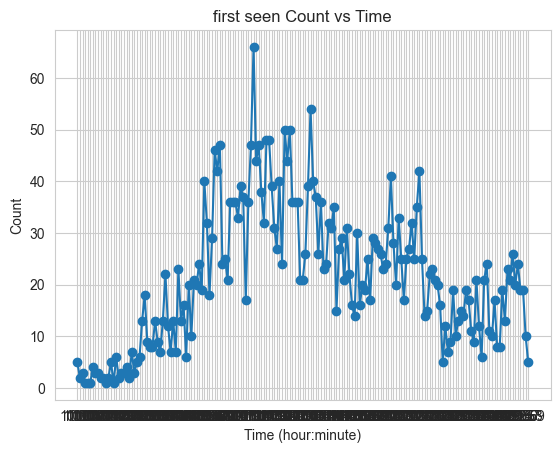

In [26]:
per_min_new = pd.DataFrame(df_first["hour:minute"].value_counts().sort_index())
plt.plot(per_min_new['count'], marker='o')
plt.xlabel('Time (hour:minute)')
plt.ylabel('Count')
plt.title('first seen Count vs Time')

In [27]:
df_last = df.drop_duplicates(subset='wlan.sa', keep='last')
df_last.tail()


,frame.time,wlan.sa,wlan.da,_ws.col.protocol,wlan.ssid,wlan.bssid,wlan.seq,wlan.fc.type_subtype,date-time,hour:minute
15336789,"Jan 10, 2024 12:59 Mitteleuropäische Zeit",28:c6:3f:7b:9b:11,00:f6:63:81:c8:6f,802.11,NaN,00:f6:63:81:c8:6f,129.0,0x000d,2024-01-10 12:59:00+01:00,12:59
15336919,"Jan 10, 2024 12:59 Mitteleuropäische Zeit",62:a1:69:00:2d:74,00:f6:63:81:c8:6f,802.11,NaN,00:f6:63:81:c8:6f,24.0,0x0024,2024-01-10 12:59:00+01:00,12:59
15338014,"Jan 10, 2024 12:59 Mitteleuropäische Zeit",de:38:e5:24:8d:9d,00:f6:63:81:c8:6f,802.11,NaN,00:f6:63:81:c8:6f,22.0,0x000e,2024-01-10 12:59:00+01:00,12:59
15338277,"Jan 10, 2024 12:59 Mitteleuropäische Zeit",3c:a6:f6:30:37:d4,00:f6:63:81:c8:6f,802.11,NaN,00:f6:63:81:c8:6f,1104.0,0x0024,2024-01-10 12:59:00+01:00,12:59
15338322,"Jan 10, 2024 12:59 Mitteleuropäische Zeit",2e:c2:34:06:37:ac,00:f6:63:81:c8:6f,802.11,NaN,00:f6:63:81:c8:6f,2924.0,0x0024,2024-01-10 12:59:00+01:00,12:59


Text(0.5, 1.0, 'Last seen Count vs Time')

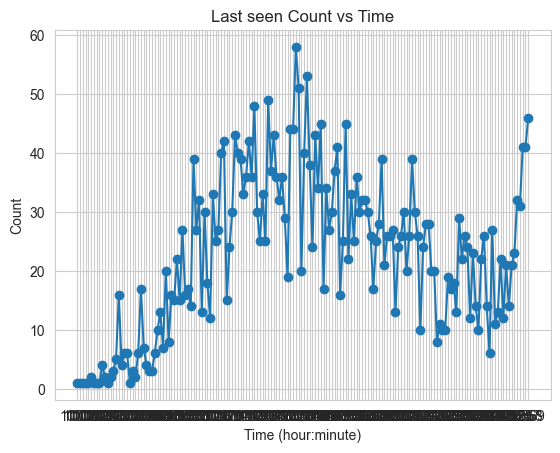

In [28]:
per_min_last = pd.DataFrame(df_last["hour:minute"].value_counts().sort_index())
plt.plot(per_min_last['count'], marker='o')
plt.xlabel('Time (hour:minute)')
plt.ylabel('Count')
plt.title('Last seen Count vs Time')

Text(0.5, 1.0, 'Count vs Time')

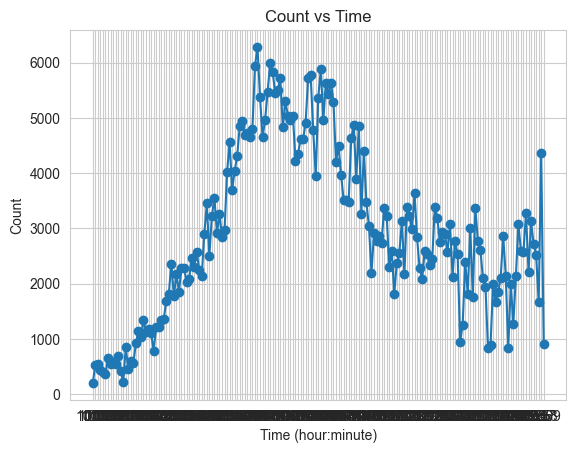

In [29]:
per_min = pd.DataFrame(df["hour:minute"].value_counts().sort_index())
plt.plot(per_min['count'], marker='o')
plt.xlabel('Time (hour:minute)')
plt.ylabel('Count')
plt.title('Count vs Time')

C:\Users\Philipp\AppData\Local\Temp\ipykernel_16868\2032286373.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dtt['hour:minute'] = pd.to_datetime(dtt['hour:minute'], format=None)


Text(0.5, 1.0, 'Count vs Time')

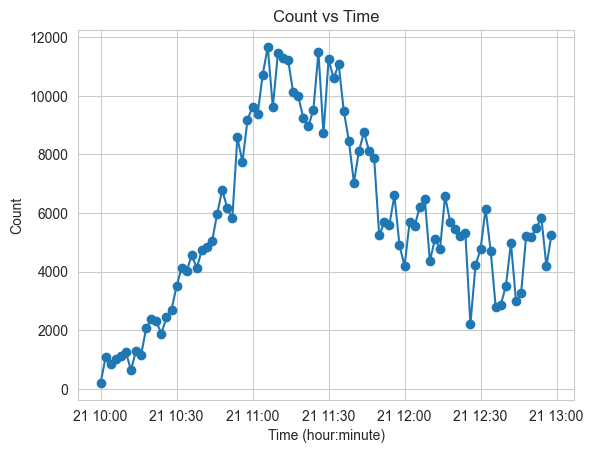

In [30]:
dtt = pd.DataFrame({'hour:minute': per_min.index.tolist(), 'count': per_min["count"]})
dtt['hour:minute'] = pd.to_datetime(dtt['hour:minute'], format=None)
dtt.set_index('hour:minute', inplace=True)
dtt_new = dtt.resample('2T').sum()
dtt_new
plt.plot(dtt_new['count'], marker="o")
plt.xlabel('Time (hour:minute)')
plt.ylabel('Count')
plt.title('Count vs Time')

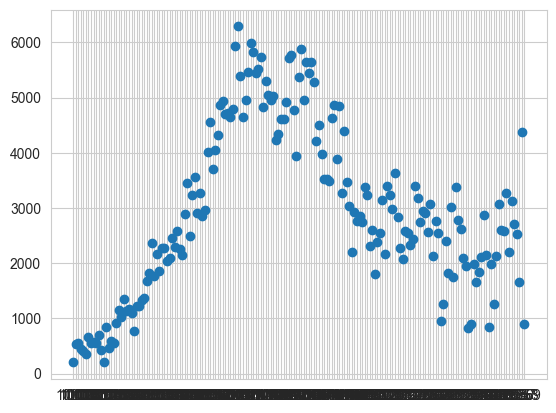

In [31]:
ax = plt.plot_date(per_min.index, per_min["count"], xdate=True)

In [15]:
from dateutil import parser
from datetime import datetime
import re